In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yvtsanlevy/moore-law?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/yvtsanlevy/moore-law


100%|██████████| 701/701 [00:00<00:00, 695kB/s]

In [20]:
data = pd.read_csv('D:\\pytorch\\pytorch\\machine learning\\moore-law\\moore.csv', header=None,on_bad_lines='skip').values
data.shape

(162, 2)

In [21]:
# making it a 2D array of shape N x D where D = 1
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)

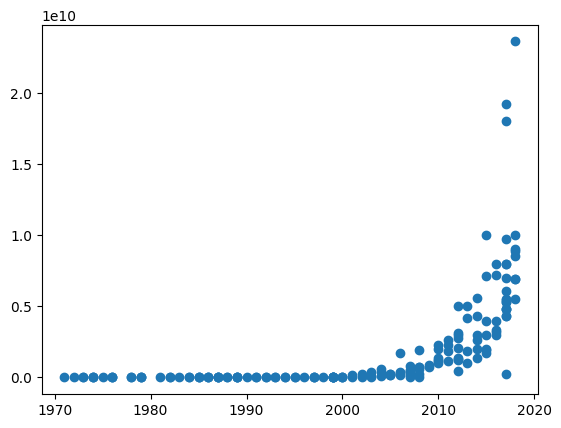

In [22]:
plt.scatter(X,Y)

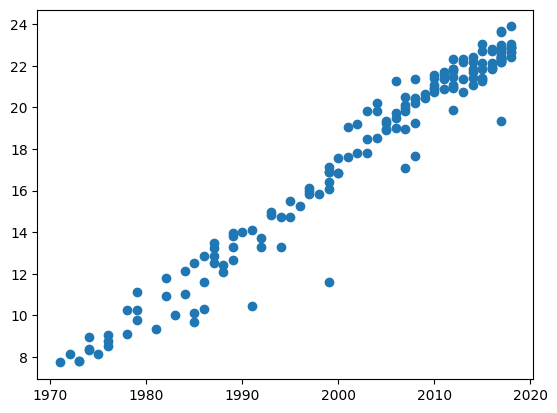

In [23]:
# to make linear model let take log
Y = np.log(Y)
plt.scatter(X,Y)

In [24]:
# Scale and center both the X and Y axes

mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx) / sx
Y = (Y - my) / sy

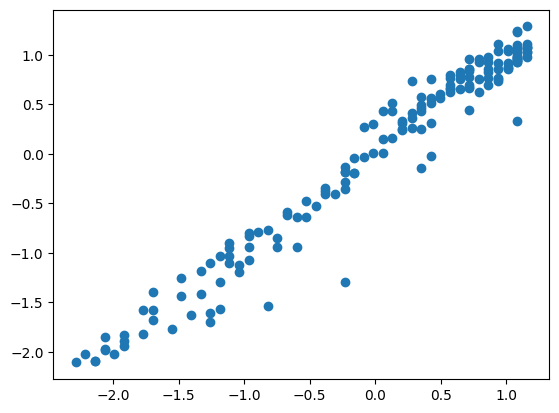

In [25]:
plt.scatter(X,Y)

In [26]:
# convert to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [27]:
# create the model
model=nn.Linear(1,1)

In [29]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1,momentum=0.7)

In [31]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [33]:
epochs = 100
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 4.1043
Epoch 2/100, Loss: 2.6406
Epoch 3/100, Loss: 1.0549
Epoch 4/100, Loss: 0.1853
Epoch 5/100, Loss: 0.0557
Epoch 6/100, Loss: 0.2545
Epoch 7/100, Loss: 0.4050
Epoch 8/100, Loss: 0.3781
Epoch 9/100, Loss: 0.2413
Epoch 10/100, Loss: 0.1101
Epoch 11/100, Loss: 0.0459
Epoch 12/100, Loss: 0.0419
Epoch 13/100, Loss: 0.0602
Epoch 14/100, Loss: 0.0711
Epoch 15/100, Loss: 0.0666
Epoch 16/100, Loss: 0.0541
Epoch 17/100, Loss: 0.0434
Epoch 18/100, Loss: 0.0388
Epoch 19/100, Loss: 0.0390
Epoch 20/100, Loss: 0.0406
Epoch 21/100, Loss: 0.0413
Epoch 22/100, Loss: 0.0408
Epoch 23/100, Loss: 0.0397
Epoch 24/100, Loss: 0.0388
Epoch 25/100, Loss: 0.0385
Epoch 26/100, Loss: 0.0385
Epoch 27/100, Loss: 0.0387
Epoch 28/100, Loss: 0.0387
Epoch 29/100, Loss: 0.0387
Epoch 30/100, Loss: 0.0386
Epoch 31/100, Loss: 0.0385
Epoch 32/100, Loss: 0.0385
Epoch 33/100, Loss: 0.0385
Epoch 34/100, Loss: 0.0385
Epoch 35/100, Loss: 0.0385
Epoch 36/100, Loss: 0.0385
Epoch 37/100, Loss: 0.0385
Epoch 38/1

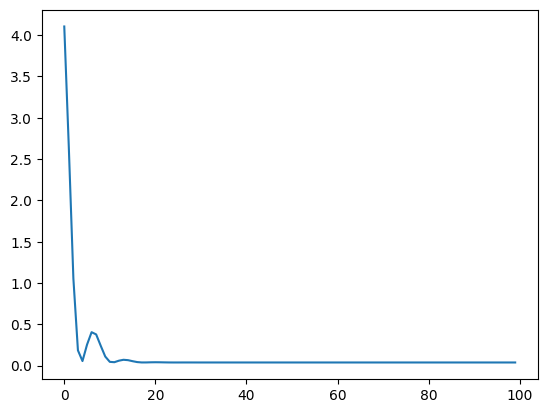

In [34]:
plt.plot(losses)

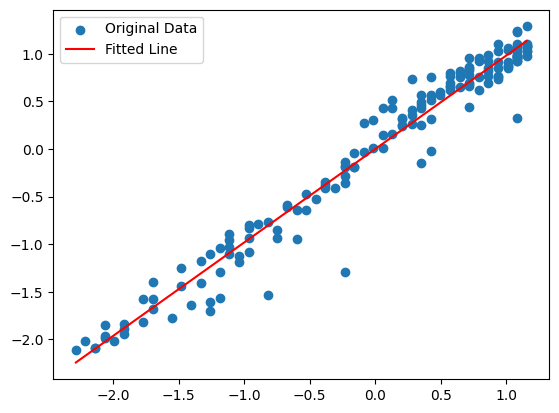

In [35]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label='Original Data')
plt.plot(X,predicted,label='Fitted Line',color='red')
plt.legend()
plt.show()

In [36]:
w = model.weight.data.numpy()
print(w)

[[0.9805711]]


- We know that C = C_0 * r^t
- log C = log C_0 + t*log r
- y = ax + log C_0 where y = log C , x = t and a = log r
- so what we achieved it x

In [38]:
# value of slope in the original scale
a = w[0,0] * sy / sx
a

np.float64(0.341682476269441)